# Seed Values

In [ ]:
seed_value= 0
# seed_value= 1
# seed_value= 2
# seed_value= 3
# seed_value= 4
# seed_value= 5
# seed_value= 6
# seed_value= 7
# seed_value= 8
# seed_value= 9
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

In [ ]:
import random
import numpy as np
from numpy import mean,std
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
from sklearn.model_selection import RepeatedKFold,RepeatedStratifiedKFold,train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)

In [ ]:
from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices())
import sys
print (sys.version)
# 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
import tensorflow as tf
print(tf.__version__)

['/device:CPU:0', '/device:GPU:0']
3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
2.5.0


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Num GPUs Available:  1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

## Dataset

In [ ]:
train=pd.read_csv("train_wo_prep.csv",sep=",") #dataset input
test=pd.read_csv("test_wo_prep.csv",sep=",")

In [ ]:
train #How the dataset supposed to be structured

,X1_1,X1_2,X1_3,X1_4,X1_5,X1_6,X1_7,X1_8,X1_9,X1_10,X1_11,X1_12,X1_13,X1_14,X1_15,X1_16,X1_17,X_18,X1_19,X1_20,X2_1,X2_2,X2_3,X2_4,X2_5,X2_6,X2_7,X2_8,X2_9,X2_10,X2_11,X2_12,X2_13,X2_14,X2_15,X2_16,X2_17,X2_18,X2_19,X2_20,...,X19_3,X19_4,X19_5,X19_6,X19_7,X19_8,X19_9,X19_10,X19_11,X19_12,X19_13,X19_14,X19_15,X19_16,X19_17,X19_18,X19_19,X19_20,X20_1,X20_2,X20_3,X20_4,X20_5,X20_6,X20_7,X20_8,X20_9,X20_10,X20_11,X20_12,X20_13,X20_14,X20_15,X20_16,X20_17,X20_18,X20_19,X20_20,T1,T2
0,0,0,0,1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0.492140,0.447617
1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0.520715,0.410228
2,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1,1,1,1,...,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0.413174,0.510186
3,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0.471199,0.463462
4,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,1,...,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0.481989,0.451889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,1,1,...,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0.519801,0.415703
12796,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0.423571,0.482185
12797,1,0,1,1,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,1,0,...,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,0,0,1,0,1,0.437157,0.465218
12798,1,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,1,0,...,0,1,1,0,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0.518521,0.417768


In [ ]:
X = np.copy(train)
#X= X.astype('float32')
y = np.copy(test)
#y = np.reshape(y, (-1,1))
print(X.shape, y.shape)

(12800, 402) (3200, 402)


In [ ]:
X_train, y_train = train[train.columns[0:400]], train[train.columns[400:402]]
X_test, y_test = test[train.columns[0:400]], test[train.columns[400:402]]

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(12800, 400) (12800, 2) (3200, 400) (3200, 2)


In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

# Model

In [ ]:
def get_model():

    opt = Adam(lr=0.005, epsilon=0.0003)
    n_inputs = 400
    # define our MLP network
    model = Sequential()
    model.add(Dense(25, input_dim=n_inputs, kernel_initializer='he_uniform', activation="relu"))
    model.add(Dense(10, kernel_initializer='he_uniform', activation="relu"))
    model.add(Dense(2, activation="linear"))
    model.compile(loss='mean_squared_error', optimizer=opt)
    # return our model
    return model

In [ ]:
with tf.device('/device:GPU:0'):

    #model.fit(X,y, epochs=10,batch_size=128,validation_split=0.1 )

    results = list()

    # define evaluation procedure
    #cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
    # enumerate folds
    #for train_ix, test_ix in cv.split(X):
        # prepare data
    #X_train, X_test = X[train_ix], X[test_ix]
    #y_train, y_test = y[train_ix], y[test_ix]
    #X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,shuffle=True)

    # define model
    model = get_model()
    history = model.fit(X_train, y_train, epochs=25, batch_size=100,  verbose=1, validation_split=0.2)
    mse = model.evaluate(X_test, y_test, verbose=1)

    print('>%.3f' % mse)

    #model.fit(X_train, y_train, verbose=1, epochs=100,batch_size=128,validation_split=0.1)

    # fit model
    yhat = model.predict(X_test)
    #yhat = yhat.round()

    # calculate accuracy
    mse = mean_squared_error(y_test, yhat, squared=True)
    # store result
    print('>%.3f' % mse)
    results.append(mse)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
103/103 [==============================] - 1s 4ms/step - loss: 0.1502 - val_loss: 0.0086
Epoch 2/25
103/103 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0059
Epoch 3/25
103/103 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 4/25
103/103 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/25
103/103 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 6/25
103/103 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/25
103/103 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 8/25
103/103 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/25
103/103 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/25
103/103 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014

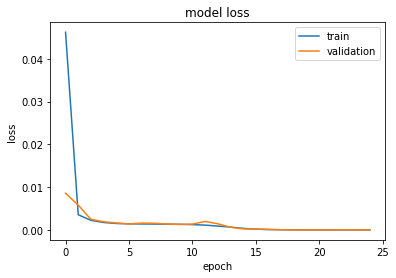

In [ ]:
import matplotlib.pyplot as plt
#print('>%.3f' % test_acc)
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.savefig('train_vs_validation.svg')
#plt.savefig('train_vs_validation.png', dpi = 600)
plt.show()

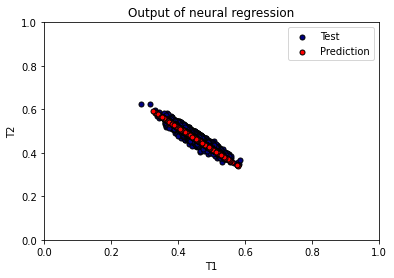

In [ ]:
plt.figure()
s = 25
plt.scatter(y_test[:, 0], y_test[:, 1], c="navy", s=s,
            edgecolor="black", label="Test")
plt.scatter(yhat[:, 0], yhat[:, 1], c="red", s=s,
            edgecolor="black", label="Prediction")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("T1")
plt.ylabel("T2")
plt.title("Output of neural regression")
plt.legend(loc="best")
plt.show()

In [ ]:
from math import sqrt
mean_sq_er = (sum((yhat-y_test)**2)/3200)
t1_rmse = sqrt(mean_sq_er[0])
t2_rmse = sqrt(mean_sq_er[1])

In [ ]:
print(t1_rmse,t2_rmse)

0.008939865167648836 0.00959428602533055


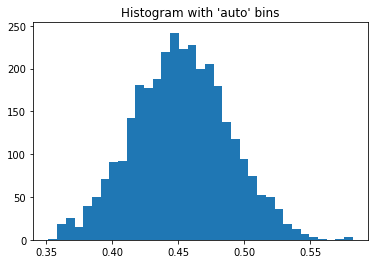

In [ ]:
_ = plt.hist(yhat[:, 0], bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()

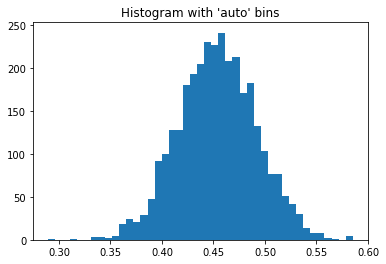

In [ ]:
_ = plt.hist(y_test[:, 0], bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()

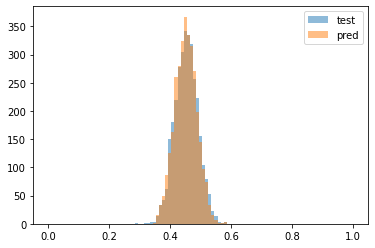

In [ ]:
a_test = y_test[:, 0]
b_pred = yhat[:, 0]

bins = np.linspace(0, 1, 100)

plt.hist(a_test, bins, alpha=0.5, label='test')
plt.hist(b_pred, bins, alpha=0.5, label='pred')
plt.legend(loc='upper right')
plt.show()

In [ ]:
NN_pred = pd.DataFrame({'NN_T1_Pred': yhat[:, 0], 'NN_T2_Pred': yhat[:, 1]})
train_vs_valid = pd.DataFrame({'train_loss': history.history['loss'], 'val_loss': history.history['val_loss']})

In [ ]:
NN_pred.to_excel("NN_pred_seed9.xlsx")
#train_vs_valid.to_excel("train_vs_val_loss.xlsx")

In [ ]:
!kill -9 -1